In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import scipy.io
import skimage as ski

In [2]:
# Computational model parameters

zmin = 0.; zmax = 3.; deltaz = 0.02;
xmin = 0.; xmax = 3.; deltax = 0.02;
deltas = 0.2

# Loading the velocity model
vp = np.load('./over_vp_sigma5.npy')
vs = np.load('./over_vs_sigma5.npy')

vp_noi = vp + np.random.randn(vp.shape[0],vp.shape[1])*0.1
vs_noi = vs + np.random.randn(vs.shape[0],vs.shape[1])*0.05

vp_true = vp
vs_true = vs
# Point-source locations

sz = np.round(np.arange(0,3.001,deltas),2);
sx = np.zeros(sz.shape)

rz = np.round(np.arange(0,3.001,0.02),2)
rx = 3.0*np.ones(rz.shape)

In [3]:
print(sz.shape)

(16,)


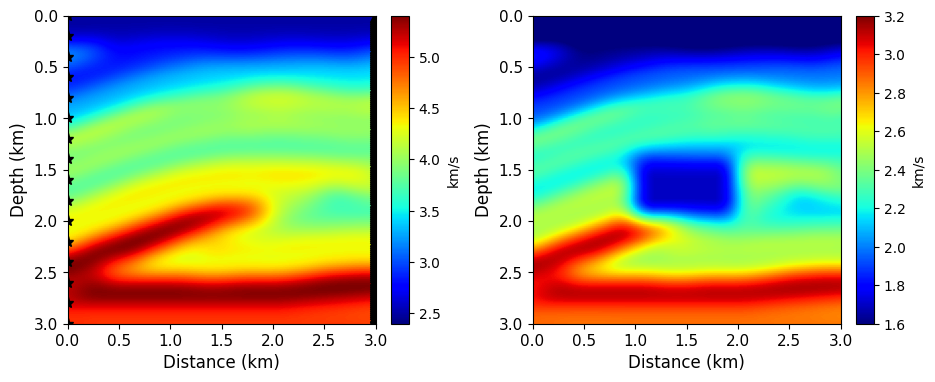

In [4]:
# Plot the velocity model with the source location
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('default')

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(vp_true, extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")
ax.plot(sx,sz,'k*',markersize=8)
ax.plot(rx,rz,'k^',markersize=8)

plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=11)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=11)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(2.4,5.4)

cbar.set_label('km/s',size=10)
cbar.ax.tick_params(labelsize=10)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(vs_true, extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")

plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=11)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=11)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(1.6,3.2)

cbar.set_label('km/s',size=10)
cbar.ax.tick_params(labelsize=10)

plt.savefig("./Fig/over_true_crosswell.jpeg", format='jpeg', bbox_inches="tight",dpi=400)

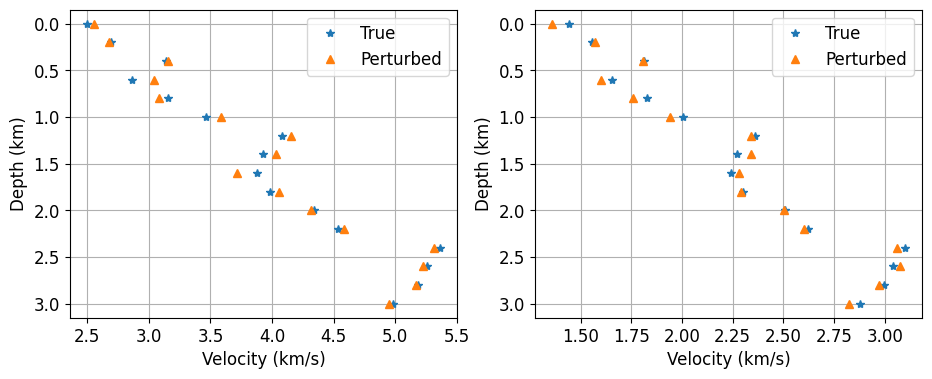

In [5]:
font_size = 12
dz = 0.02
z = np.arange(zmin,zmax+dz,dz)
trace = 0

plt.style.use('default')

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)

plt.plot(vp[::10,trace],z[::10],'*')
plt.plot(vp_noi[::10,trace],z[::10],'^')

plt.xlabel('Velocity (km/s)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)


plt.gca().invert_yaxis()

plt.legend(['True','Perturbed'],fontsize=font_size)

plt.grid()

plt.subplot(1,2,2)

plt.plot(vs[::10,trace],z[::10],'*')
plt.plot(vs_noi[::10,trace],z[::10],'^')


plt.xlabel('Velocity (km/s)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.gca().invert_yaxis()

plt.legend(['True','Perturbed'],fontsize=font_size)

plt.grid()

plt.savefig("./Fig/over_V_perturb.jpeg", format='jpeg', bbox_inches="tight",dpi=400)

In [6]:
epoch_num = 500

vp_new = np.load('./over_pinntomo_vppred_random_new%d.npy'%(epoch_num))
vs_new = np.load('./over_pinntomo_vspred_random_new%d.npy'%(epoch_num))

vp_ori = np.load('./over_pinntomo_vppred_random_ori%d.npy'%(epoch_num))
vs_ori = np.load('./over_pinntomo_vspred_random_ori%d.npy'%(epoch_num))

vp_noi = np.load('./over_pinntomo_vppred_random_ori_noi%d.npy'%(epoch_num))
vs_noi = np.load('./over_pinntomo_vspred_random_ori_noi%d.npy'%(epoch_num))

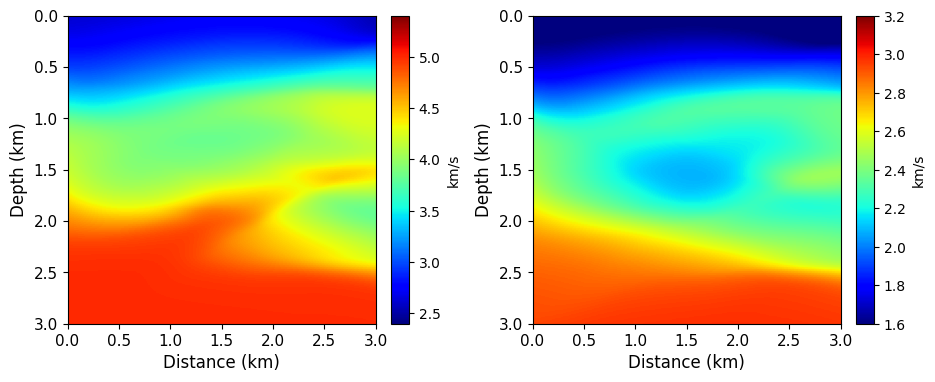

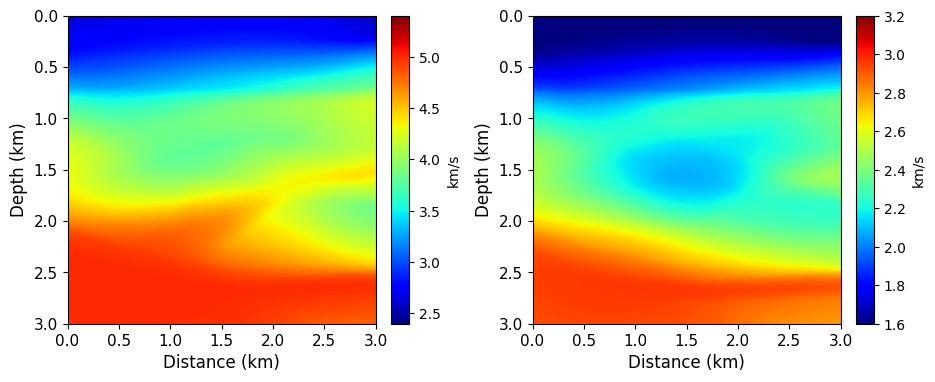

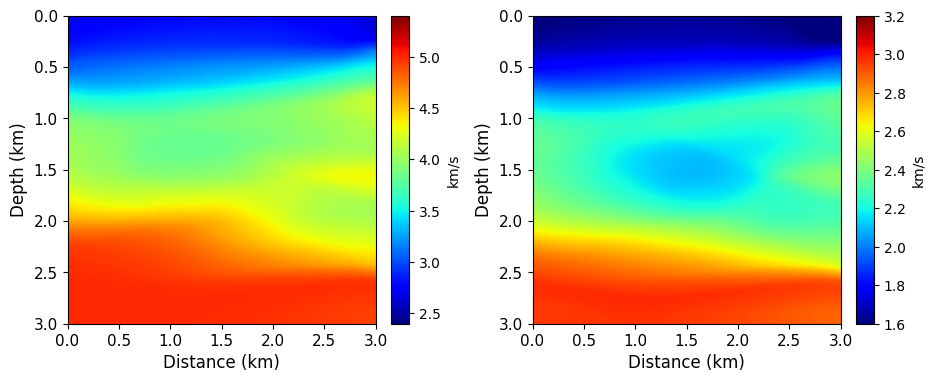

In [7]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(vp_new[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")

plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=11)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=11)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(2.4,5.4)

cbar.set_label('km/s',size=10)
cbar.ax.tick_params(labelsize=10)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(vs_new[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")

plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=11)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=11)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(1.6,3.2)

cbar.set_label('km/s',size=10)
cbar.ax.tick_params(labelsize=10)

plt.savefig("./Fig/over_vp_vs_pred_random_new%d.jpeg"%(epoch_num), format='jpeg', bbox_inches="tight",dpi=400)

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(vp_ori[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")

plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=11)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=11)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(2.4,5.4)

cbar.set_label('km/s',size=10)
cbar.ax.tick_params(labelsize=10)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(vs_ori[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")

plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=11)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=11)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(1.6,3.2)

cbar.set_label('km/s',size=10)
cbar.ax.tick_params(labelsize=10)

plt.savefig("./Fig/over_vp_vs_pred_random_ori%d.jpeg"%(epoch_num), format='jpeg', bbox_inches="tight",dpi=400)


plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(vp_noi[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")

plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=11)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=11)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(2.4,5.4)

cbar.set_label('km/s',size=10)
cbar.ax.tick_params(labelsize=10)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(vs_noi[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")

plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=11)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=11)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(1.6,3.2)

cbar.set_label('km/s',size=10)
cbar.ax.tick_params(labelsize=10)

plt.savefig("./Fig/over_vp_vs_pred_tomo_random_ori_noi%d.jpeg"%(epoch_num), format='jpeg', bbox_inches="tight",dpi=400)

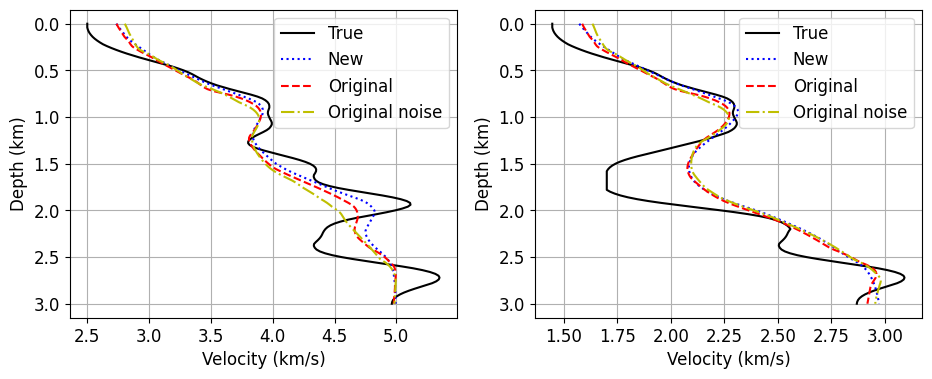

In [8]:
dz = 0.02
font_size = 12
z = np.arange(zmin,zmax+dz,dz)
trace = 75

plt.style.use('default')

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)

plt.plot(vp[:,trace],z,'k-')
plt.plot(vp_new[:,trace,0],z,'b:')
plt.plot(vp_ori[:,trace,0],z,'r--')
plt.plot(vp_noi[:,trace,0],z,'y-.')

plt.xlabel('Velocity (km/s)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)


plt.gca().invert_yaxis()

plt.legend(['True','New','Original','Original noise'],fontsize=font_size)

plt.grid()

plt.subplot(1,2,2)

plt.plot(vs[:,trace],z,'k-')
plt.plot(vs_new[:,trace,0],z,'b:')
plt.plot(vs_ori[:,trace,0],z,'r--')
plt.plot(vs_noi[:,trace,0],z,'y-.')

plt.xlabel('Velocity (km/s)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.gca().invert_yaxis()

plt.legend(['True','New','Original','Original noise'],fontsize=font_size)

plt.grid()

plt.savefig("./Fig/over_V_trace_tomo%d.jpeg"%(trace), format='jpeg', bbox_inches="tight",dpi=400)

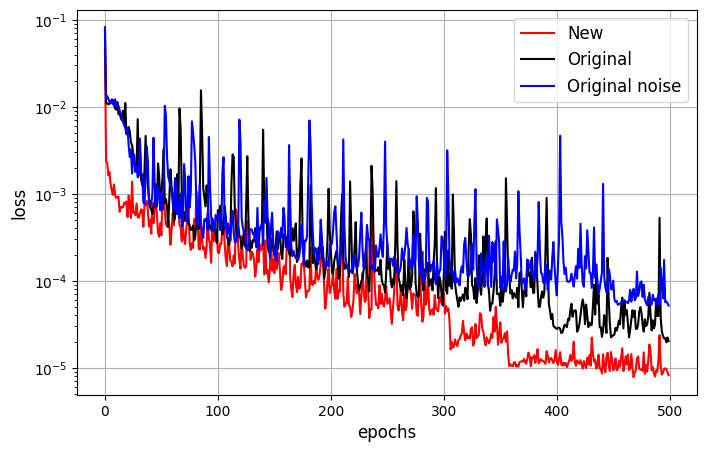

In [9]:
loss_tomo_new = np.load('./loss_tomo_over_random_new%d.npy'%(epoch_num))
loss_tomo_ori = np.load('./loss_tomo_over_random_ori%d.npy'%(epoch_num))
loss_tomo_ori_noi = np.load('./loss_tomo_over_random_ori_noi%d.npy'%(epoch_num))

plt.style.use('default')

plt.figure(figsize=(8,5))

ax = plt.gca()
plt.semilogy(loss_tomo_new[::1],'r')
plt.semilogy(loss_tomo_ori[::1],'k')
plt.semilogy(loss_tomo_ori_noi[::1],'b')

plt.xlabel('epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(['New','Original','Original noise'], fontsize=12)
plt.grid()
plt.savefig("./Fig/over_loss_comp_vsp_random_noi.jpeg", format='jpeg', bbox_inches="tight",dpi=400)

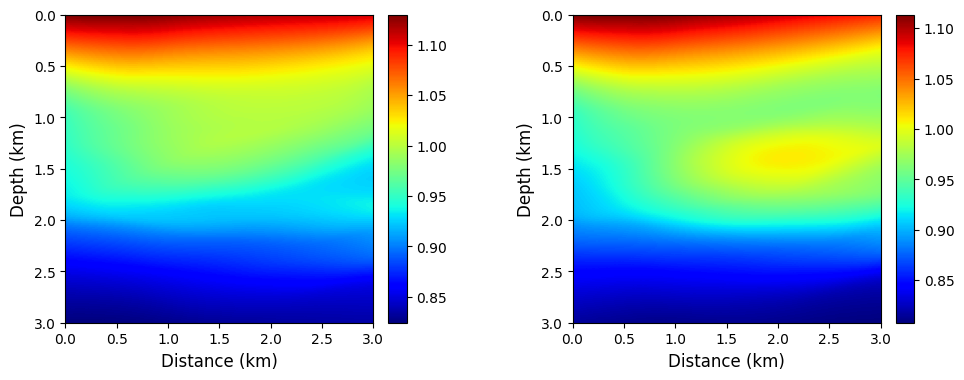

In [15]:
epoch_num = 500
taup_pred = np.load('./over_pinntomo_taup_pred_random_ori%d.npy'%(epoch_num))
taus_pred = np.load('./over_pinntomo_taus_pred_random_ori%d.npy'%(epoch_num))

isou = 8
plt.style.use('default')

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(taup_pred[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

# cbar.set_label('s/km',size=10)
# cbar.ax.tick_params(labelsize=10)

plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(taus_pred[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

# cbar.set_label('s/km',size=10)
# cbar.ax.tick_params(labelsize=10)

plt.savefig("./Fig/over_taup_taus_pred_tomo_ori.jpeg", format='jpeg', bbox_inches="tight",dpi=400)

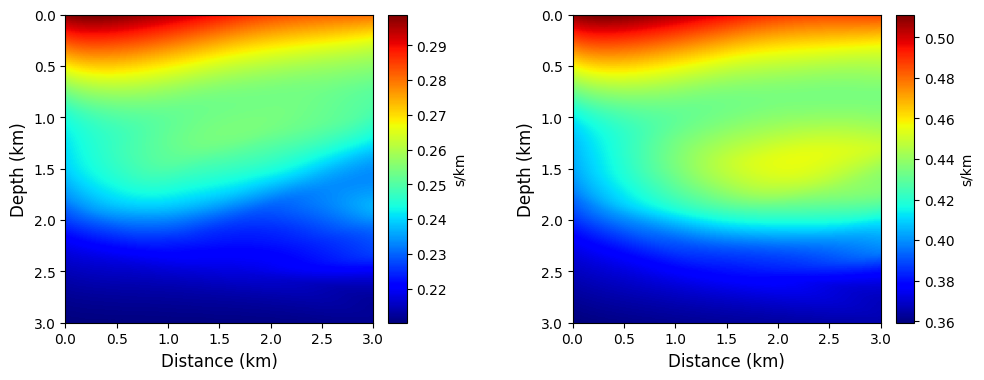

In [16]:
taup_pred = np.load('./over_pinntomo_taup_pred_random_new%d.npy'%(epoch_num))
taus_pred = np.load('./over_pinntomo_taus_pred_random_new%d.npy'%(epoch_num))

plt.style.use('default')

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(taup_pred[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

cbar.set_label('s/km',size=10)
cbar.ax.tick_params(labelsize=10)

plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(taus_pred[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Distance (km)', fontsize=12)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=12)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

cbar.set_label('s/km',size=10)
cbar.ax.tick_params(labelsize=10)

plt.savefig("./Fig/over_taup_taus_pred_tomo_new.jpeg", format='jpeg', bbox_inches="tight",dpi=400)